In [1]:
# Basic 

import os
import random
import re
import math
import time
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Scikit-learn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

# Deep Learning

from tqdm import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

# Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline

# Misc

import streamlit as st
from PIL import Image
import cufflinks
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
# Setting file paths for our notebook:

data_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_6000'
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

12856


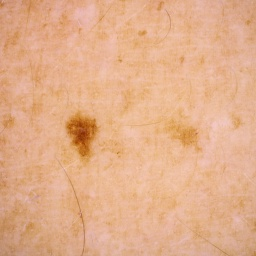

In [5]:
benign = list(data_dir.glob('benign/*'))
PIL.Image.open(str(benign[0]))

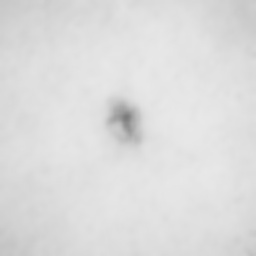

In [6]:
malignant = list(data_dir.glob('malignant/*'))
PIL.Image.open(str(malignant[0]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12856 files belonging to 2 classes.
Using 10285 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12856 files belonging to 2 classes.
Using 2571 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


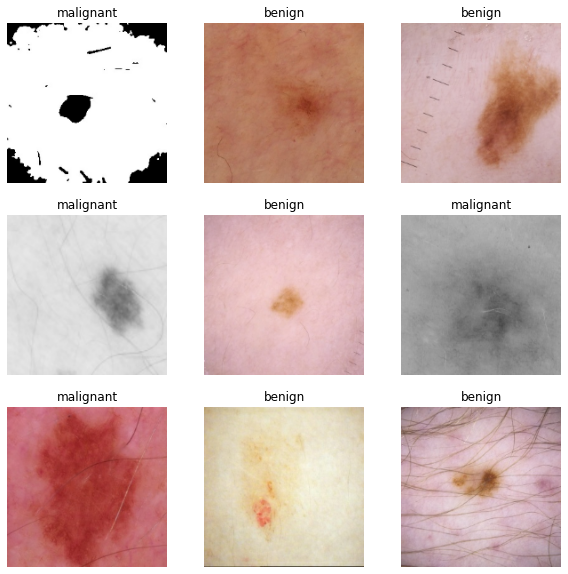

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [16]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
322/322 [==============================] - 170s 528ms/step - loss: 0.2106 - accuracy: 0.9317 - val_loss: 0.1609 - val_accuracy: 0.9553
Epoch 2/10
322/322 [==============================] - 160s 496ms/step - loss: 0.1763 - accuracy: 0.9470 - val_loss: 0.1447 - val_accuracy: 0.9572
Epoch 3/10
322/322 [==============================] - 160s 496ms/step - loss: 0.1656 - accuracy: 0.9507 - val_loss: 0.1411 - val_accuracy: 0.9576
Epoch 4/10
322/322 [==============================] - 161s 499ms/step - loss: 0.1687 - accuracy: 0.9491 - val_loss: 0.1457 - val_accuracy: 0.9576
Epoch 5/10
322/322 [==============================] - 157s 487ms/step - loss: 0.1606 - accuracy: 0.9508 - val_loss: 0.1733 - val_accuracy: 0.9564
Epoch 6/10
322/322 [==============================] - 164s 510ms/step - loss: 0.1661 - accuracy: 0.9491 - val_loss: 0.1455 - val_accuracy: 0.9553
Epoch 7/10
322/322 [==============================] - 163s 506ms/step - loss: 0.1583 - accuracy: 0.9509 - val_loss: 0.1390 -

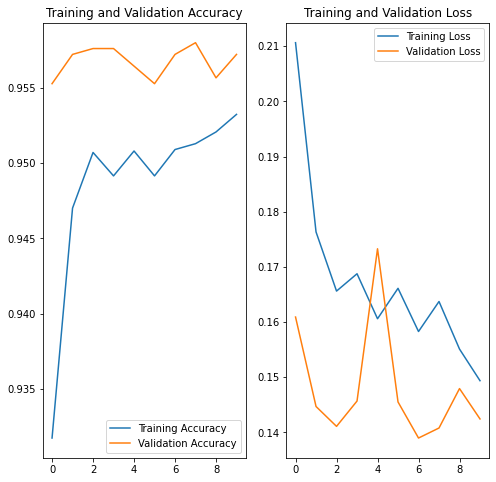

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

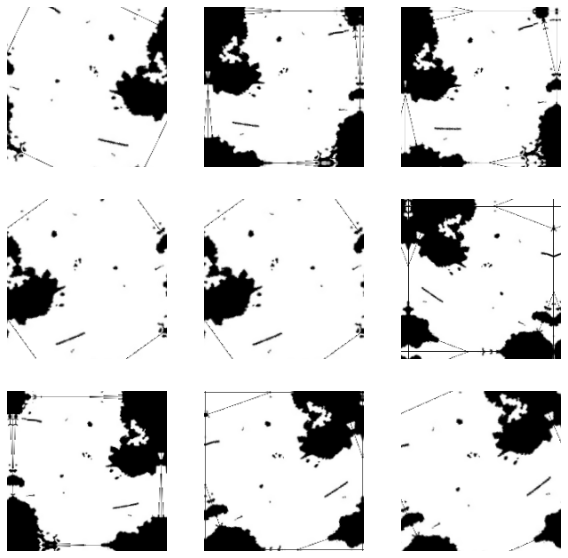

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [23]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [26]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
322/322 [==============================] - 180s 560ms/step - loss: 0.2606 - accuracy: 0.9116 - val_loss: 0.2517 - val_accuracy: 0.9090
Epoch 2/10
322/322 [==============================] - 173s 538ms/step - loss: 0.1767 - accuracy: 0.9472 - val_loss: 0.1582 - val_accuracy: 0.9564
Epoch 3/10
322/322 [==============================] - 180s 559ms/step - loss: 0.1702 - accuracy: 0.9489 - val_loss: 0.1472 - val_accuracy: 0.9564
Epoch 4/10
322/322 [==============================] - 199s 617ms/step - loss: 0.1709 - accuracy: 0.9483 - val_loss: 0.1397 - val_accuracy: 0.9580
Epoch 5/10
322/322 [==============================] - 179s 555ms/step - loss: 0.1611 - accuracy: 0.9515 - val_loss: 0.1421 - val_accuracy: 0.9568
Epoch 6/10
322/322 [==============================] - 173s 537ms/step - loss: 0.1623 - accuracy: 0.9511 - val_loss: 0.1475 - val_accuracy: 0.9572
Epoch 7/10
322/322 [==============================] - 172s 535ms/step - loss: 0.1576 - accuracy: 0.9522 - val_loss: 0.1513 -

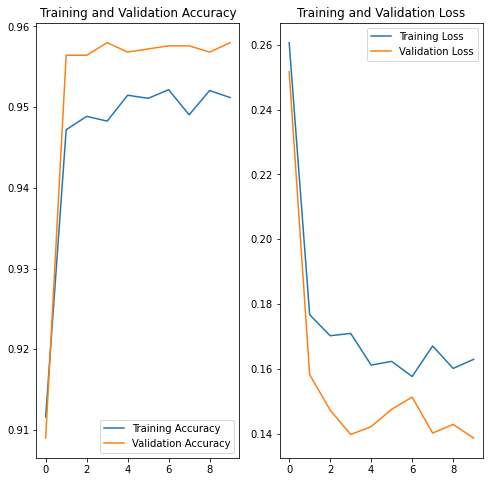

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
# test_image_url = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test\ISIC_0112420.jpg'
test_image_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_class\malignant\ISIC_4523382.jpg'

img = keras.preprocessing.image.load_img(
    test_image_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to benign with a 56.52 percent confidence.


In [29]:
tf.keras.models.save_model(model, 'my_model_6000.hdf5')

In [30]:
%%writefile app1.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('my_model_6000.hdf5')
    return model
model = load_model()
st.write("""
        # Melanoma Classification
""")

file = st.file_uploader("Please upload image file", type=["jpg", "png"])
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    size = (180, 180)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    
    return prediction

if file is None:
    st.text("Please upload image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    class_names = ['Benign', 'Malignant']
    string = "This image most likely belongs to {} with a {:.2f}% confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
    st.success(string)

Writing app1.py


In [31]:
!ngrok authtoken 1lJlGZQQXEgbwYLo0nblXjSPAls_4bm4H7Xc2LAQuPvwyhAbR

Authtoken saved to configuration file: C:\Users\HIMANSHU/.ngrok2/ngrok.yml


In [34]:
!streamlit run app1.py 

^C


In [35]:
# from pyngrok import ngrok
# url = ngrok.connect(port=8501)
# url